## Introducción a Regresión Logística Simple

### Variables Dependientes Binarias y Regresores Continuos

El modelo que revisamos en regresión **lineal** simple sirve para modelar la relación entre dos variables continuas: tanto la variable _independiente_ (o _explicativa_ ), $x$, como la _dependiente_ (o _explicada_ ), $y$, pueden tomar cualquier valor en los reales: $x, y\in \mathbb{R}$. De hecho, la identidad $y\in\mathbb{R}$ de la variable _explicada_ , $y$, permite modelar su variación como una densidad normal.

Sin embargo en muchos escenarios aplicados puede ser de interés modelar la relación entre otros tipos de variables. Uno de los más comunes consiste en modelar la relación entre una variable _explicada_ binaria, que únicamente puede tomar dos valores, $y\in [0,1]$, y una _explicativa_ real, $x\in\mathbb{R}$. 

Por ejemplo, nos puede interesar entender la relación entre la `edad` de una persona, y si tiene `alguna cicatriz`. Graficando `cicatriz` como función de `edad` podemos encontrar algo como:

In [ ]:
rm(list=ls())

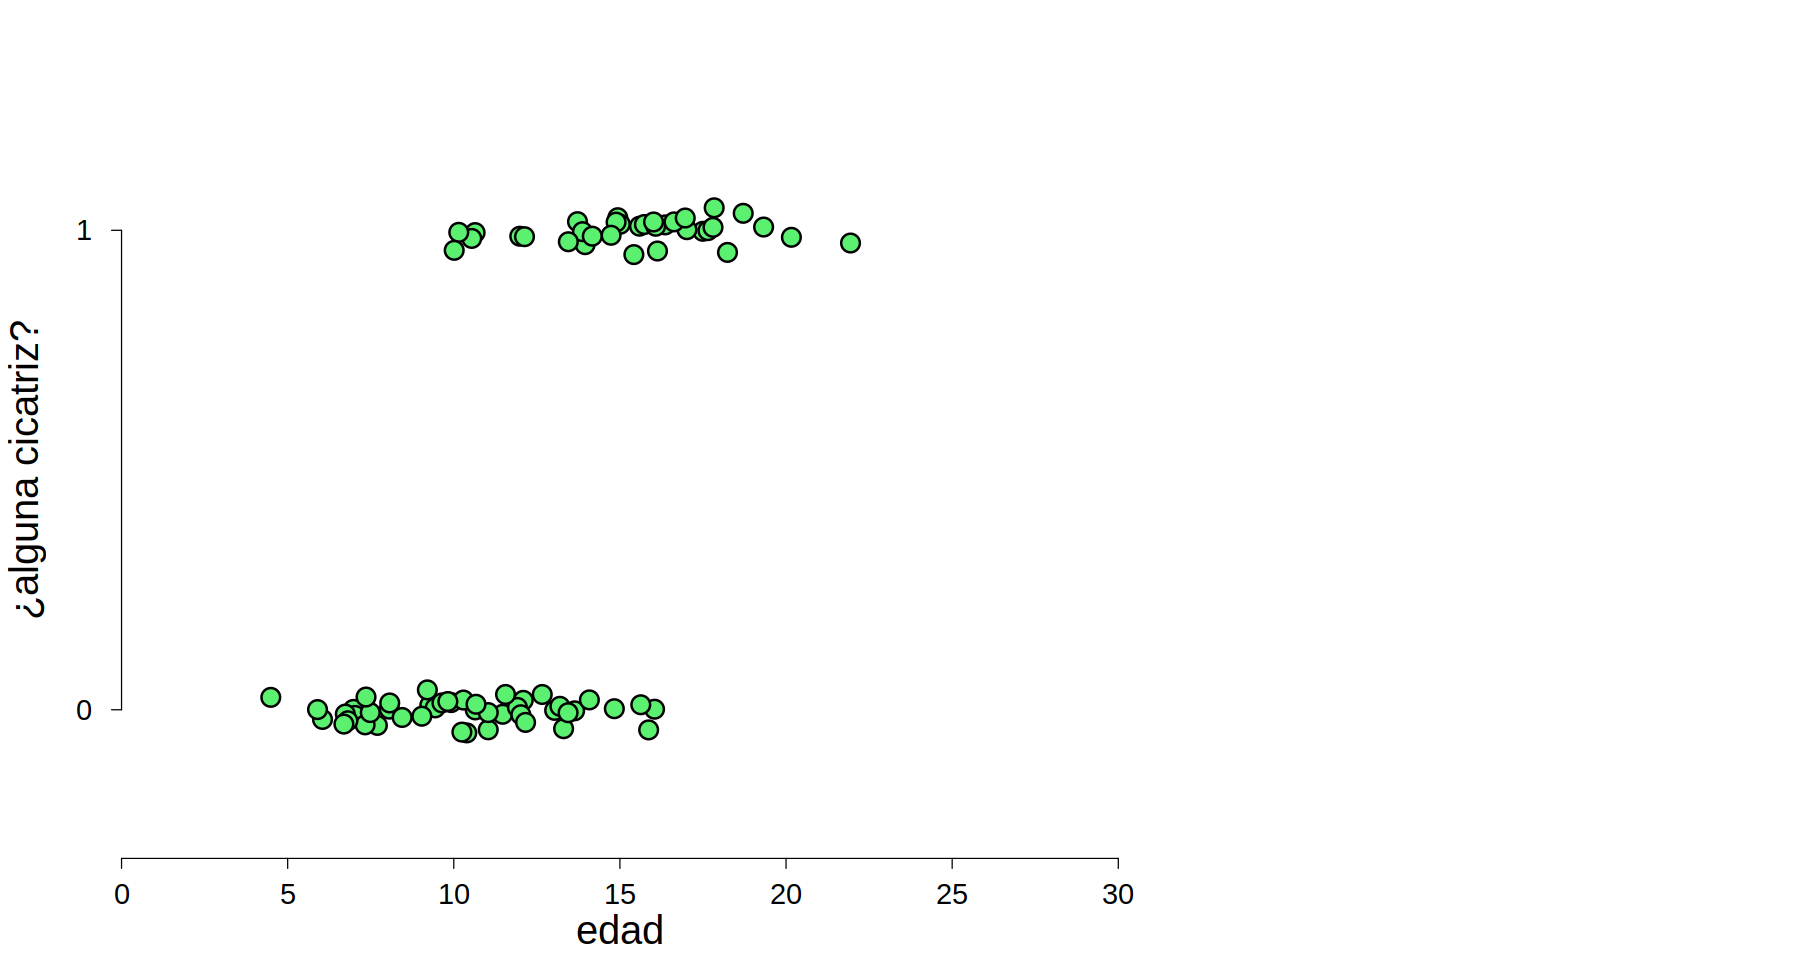

In [5]:
set.seed(15)
b0 <- -10
b1 <- .75
x_simul <- rnorm(80,mean=12,sd=4)
y_simul <- rbinom(length(x_simul),size = 1,prob = 1/(1+exp(-(b0+b1*x_simul))))

col_data <- '#5cf070'

options(repr.plot.width = 15, repr.plot.height = 8)
layout(matrix(c(1,1,0,0),ncol=2),widths = c(2,1))
par(cex.axis=1.75,mgp=c(2,1.5,0))
plot(NULL,xlim=c(0,30),ylim=c(-.25,1.25),axes=F,ann=F)
axis(1)
axis(2,at=c(0,1),las=1,pos=0)
mtext('edad',1,cex=2,line=3.5)
mtext('¿alguna cicatriz?',2,cex=2,line=2)
# Dos opciones para plotear este tipo de variables (categóricas)
# 1. Sin "jitter", datos "directos":
# points(x_simul,y_simul,cex=2.5,pch=21,bg=col_data,lwd=2)
# 2. Con "jitter": ruido *sin significado* sólo para visualizar mejor:
jitter <- rnorm(length(y_simul),mean=0,sd=0.02)
points(x_simul,y_simul+jitter,cex=2.5,pch=21,bg=col_data,lwd=2)

Intuitivamente parece que existe cierta relación entre ambas variables porque entre mayor edad es más común que la persona tenga una cicatriz. ¿Cómo podemos formalizar esta intuición?

En el modelo de regresión lineal simple utilizamos una densidad normal para describir el cambio en la variable explicada: $y\sim Gaussian(\mu_y,\sigma_y)$, en donde la tendencia central de dicha densidad, $\mu_y$, era una función lineal de la variable explicativa: $\mu_y \leftarrow \beta_0+\beta_1x$.

En el caso de la cicatriz y la edad, sin embargo, 1) **no** es adecuado utilizar la densidad normal porque la variable `cicatriz` es una **variable binaria**, mientras que el soporte de una densidad normal es una variable real, y 2) por lo tanto el parámetro que depende de la variable explicativa **no** es la media de $y$, sino la probabilidad de $y$, $\theta_y$.

En general, los modelos logísticos suponen que la variable explicada:

$$y\sim Bernoulli(\theta_y)$$

y que la probabilidad de $y$ es una función de la variable explicativa $x$:

$$\theta_y \leftarrow f(x)$$

En palabras, para explicar la relación entre la cicatriz y la edad, suponemos que entre mayor es la edad de una persona, mayor es la probabilidad de que tenga una cicatriz.

¿Cuál es la función que relaciona la probabilidad $\theta_y$ con el regresor $x$? 

Una posible alternativa podría ser utilizar una función lineal para describir dicha relación. Sin embargo esta alternativa es problemática porque, si bien parece funcionar en cierto rango restringido de $x$, genera predicciones inconsistentes en otros rangos del regresor:

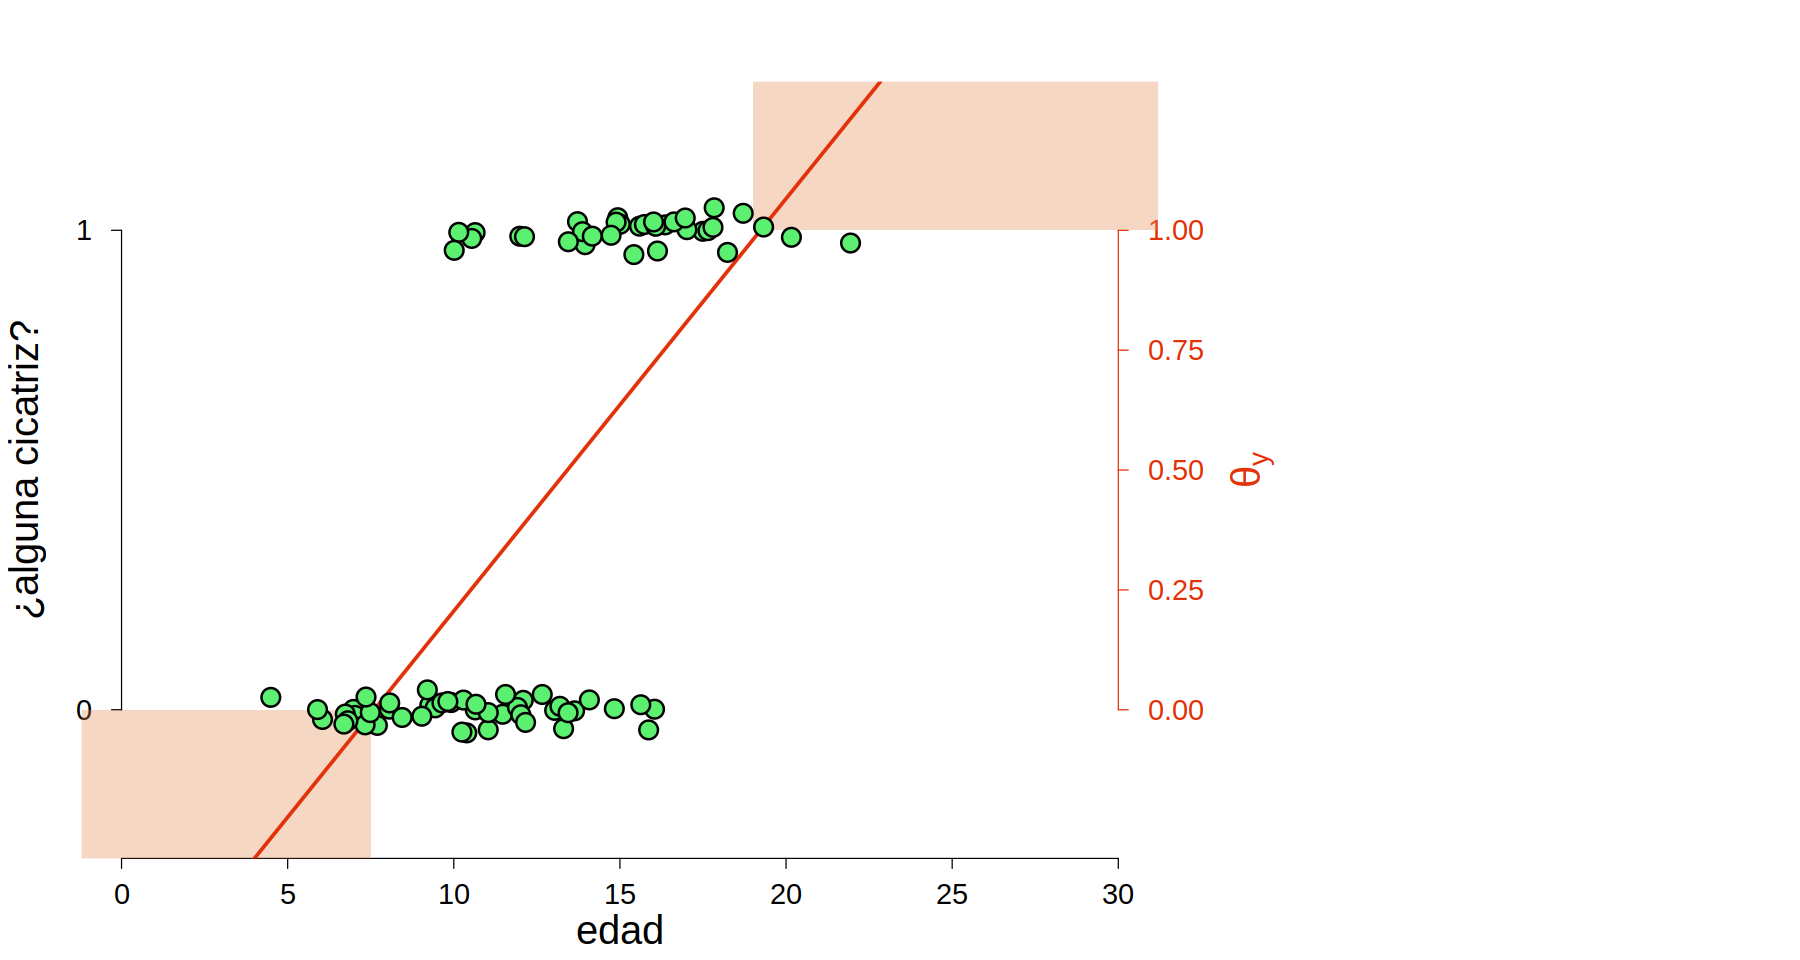

In [6]:
col_axis <- '#e23209'
options(repr.plot.width = 15, repr.plot.height = 8)
layout(matrix(c(1,1,0,0),ncol=2),widths = c(2,1))
par(cex.axis=1.75,mgp=c(2,1.5,0))
plot(NULL,xlim=c(0,30),ylim=c(-.25,1.25),axes=F,ann=F)
axis(1)
axis(2,at=c(0,1),las=1,pos=0)
axis(4,at=c(0,0.25,0.5,0.75,1),las=1,pos=30,col=col_axis,col.axis=col_axis)
mtext('edad',1,cex=2,line=3.5)
mtext('¿alguna cicatriz?',2,cex=2,line=2)
mtext(expression('\u03b8'[y]),4,cex=2,line=5,col=col_axis)

polygon(x=c(-10,7.5,7.5,-10),y=c(-1,-1,0,0),border=NA,col='#e2874e55')
polygon(x=c(19,35,35,19),y=c(2,2,1,1),border=NA,col='#e2874e55')
abline(-0.654,0.086,lwd=3,col=col_axis)

# Dos opciones para plotear este tipo de variables (categóricas)
# 1. Sin "jitter", datos "directos":
#points(x_simul,y_simul,cex=2,pch=21,bg=col_data)
# 2. Con "jitter": ruido *sin significado* sólo para visualizar mejor:
points(x_simul,y_simul+jitter,cex=2.5,pch=21,bg=col_data,lwd=2)

### (Un) Modelo Logístico

Necesitamos una función definida para $x\in\mathbb{R}$ que genere resultados en $\theta_y\in[0,1]$. Existe una amplia familia de funciones que cumplen estas restricciones, conocidas como **modelos logísticos**. Estos modelos tienen la forma:

$$f(x)=\frac{1}{1+e^{-\alpha(x-x_o)}},$$

en donde la _tasa de crecimiento_ , $\alpha\in\mathbb{R}$, controla el ritmo de aumento de la curva, y el _punto medio_ , $x_0\in\mathbb{R}$, es el valor de la variable $x$ en donde la curva alcanza su punto medio. 

Conviene explorar gráficamente el comportamiento de esta ecuación para diferentes valores de $\alpha$ y de $x_0$:

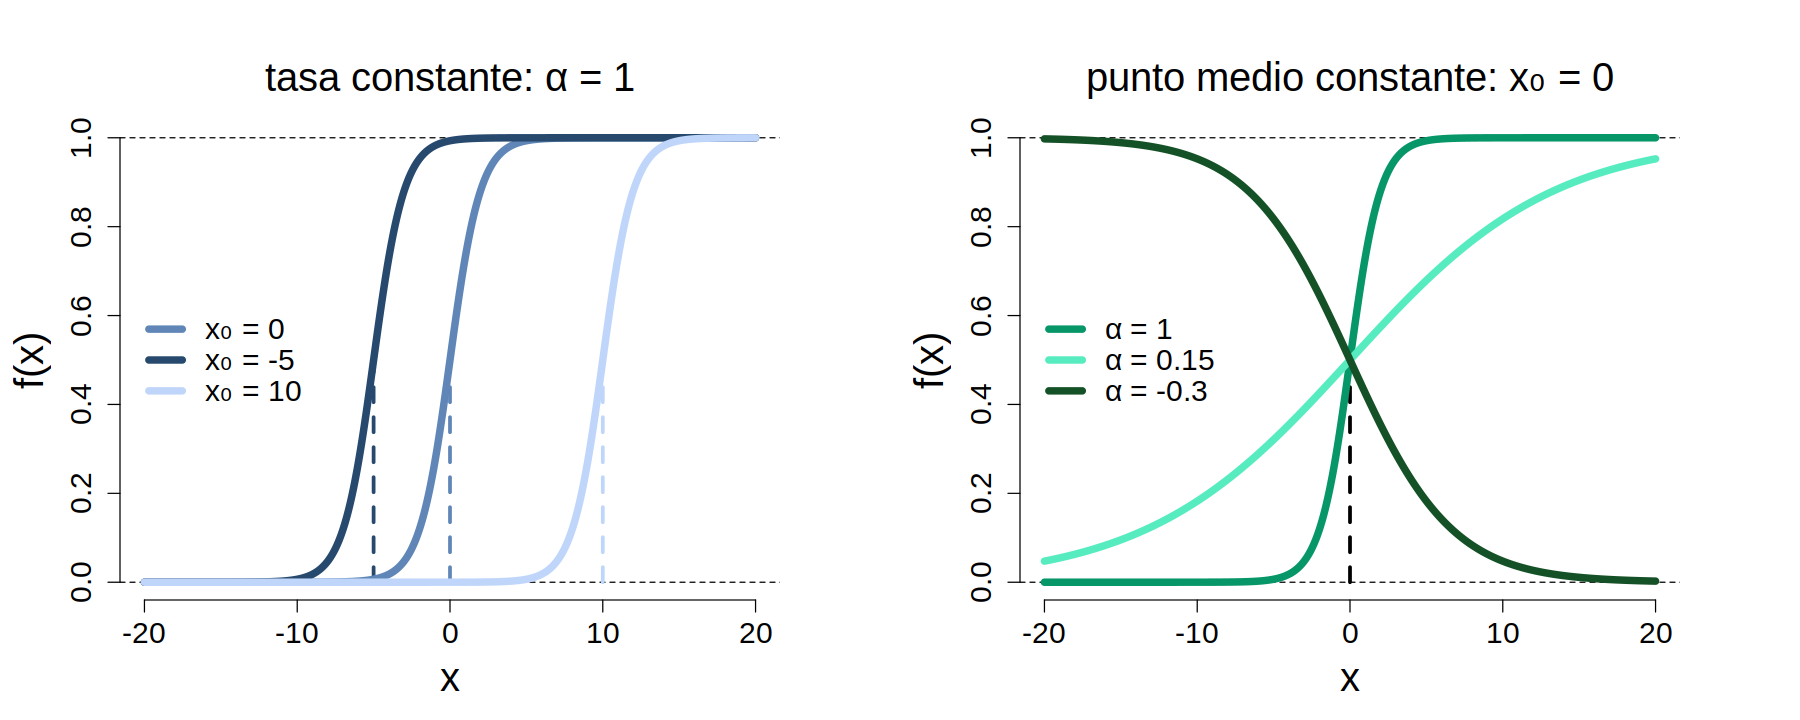

In [7]:
# Modelo Logístico
f_x <- function(x,a,x_0){
    return(1/(1+exp(-(a*(x-x_0)))))
}

options(repr.plot.width = 15, repr.plot.height = 6)
layout(matrix(1:2,ncol=2))
par(cex.axis=1.5,mar=rep(5,4))

x <- seq(-20,20,0.01)

# alpha constante:
plot(NULL,xlim=c(-20,20),ylim=c(0,1),ann=F,axes=F)
axis(1);axis(2);abline(h=c(0,1),lty='dashed')
x0 <- c(0,-5,10)
cols <- c("#5f86b7", "#26496d", "#bfd6fa") # Check: http://vrl.cs.brown.edu/color
segments(x0=x0,x1=x0,y0=rep(0,length(x0)),y1=rep(0.5,length(x0)),lty='dashed',col=cols,lwd=3)
for(i in 1:length(x0)){
    lines(x,f_x(x,1,x0[i]),col=cols[i],lwd=6)
}
legend(-27,.5,yjust=0.5,legend=paste('x\u2080 =',x0),
       lwd=6,col=cols,seg.len=.3,x.intersp=.2,text.width = 5,cex=1.5,box.lty='blank',bg=NA)
mtext('tasa constante: \u03b1 = 1',cex=2,line=1)
mtext('x',1,cex=2,line=3)
mtext('f(x)',2,cex=2,line=3)

# x0 constante:
plot(NULL,xlim=c(-20,20),ylim=c(0,1),ann=F,axes=F)
axis(1);axis(2);abline(h=c(0,1),lty='dashed')
alpha <- c(1,.15,-.3)
cols <- c("#069668", "#57ecc0", "#155126")
segments(x0=0,x1=0,y0=0,y1=0.5,lty='dashed',col='#000000',lwd=3)
for(j in 1:length(alpha)){
    lines(x,f_x(x,alpha[j],0),col=cols[j],lwd=6)
}
legend(-27,.5,yjust=0.5,legend=paste('\u03b1 =',alpha),
       lwd=6,col=cols,seg.len=.3,x.intersp=.2,text.width = 5,cex=1.5,box.lty='blank',bg=NA)
mtext('punto medio constante: x\u2080 = 0',cex=2,line=1)
mtext('x',1,cex=2,line=3)
mtext('f(x)',2,cex=2,line=3)

En el modelo logístico la interpretación de la tasa de crecimiento no es tan inmediata como en el modelo lineal porque la curva logística crece a ritmos diferentes dependiendo de la posición en $x$ (i.e., su derivada no es constante). Sin embargo, la característica más general es que mientras dicho parámetro sea **positivo** la curva **aumenta** conforme $x$ aumenta, pero si es **negativo** la curva **decrementa** conforme $x$ _aumenta_ .

Otra diferencia importante es que en el modelo logístico elpunto medio $x_0$ está en escala **del regresor** $x$, a diferencia del modelo lineal en el que tanto pendiente como intercepto estaban en escala de la variable explicada. 

### Inferencia

En nuestro ejemplo, podemos utilizar la función logística para modelar la relación entre `edad` y la _probabilidad_ de tener una `cicatriz`. Junto con la especificación de la densidad sobre $y$, y de la incertidumbre a priori sobre $\alpha$ y $x_0$, tenemos un modelo completo que tal vez pueda explicar nuestras observaciones y, si ese es el caso, cuantificar, por ejemplo, a qué `edad` se vuelve más probable tener una cicatriz que no tenerla:

$$x_0\sim Gaussian(\mu=10,\sigma=1)$$

$$\alpha\sim Gaussian(\mu=0,\sigma=1)$$

$$\theta_{y_{i}}|\alpha, x_0, x_i\leftarrow\frac{1}{1+e^{-a(x_{i}-x_0)}}$$

$$y_i|\theta_{y_{i}}\sim Bernoulli(\theta_{y_{i}})$$

In [8]:
# Observed 
y <- y_simul
x <- x_simul
n_obs <- length(x)
data_jags <- list('x','y','n_obs')

# Unobserved
unobs <- c('alpha_post','alpha_prior',
          'x0_post','x0_prior',
           'theta_y_post','theta_y_prior',
          'y_postdict_post','y_postdict_prior')

# Model
write('model{

alpha_post~dnorm(0,1)
alpha_prior~dnorm(0,1)
x0_post~dnorm(10,1)
x0_prior~dnorm(10,1)

for(i in 1:n_obs){
    theta_y_post[i] <- 1/(1+exp(-alpha_post*(x[i]-x0_post)))
    theta_y_prior[i] <- 1/(1+exp(-alpha_prior*(x[i]-x0_prior)))
    y[i]~dbern(theta_y_post[i])
    y_postdict_post[i]~dbern(theta_y_post[i])
    y_postdict_prior[i]~dbern(theta_y_prior[i])
}

}
','simple_logistic_regression.bug')

library('R2jags')
set.seed(18)
bayes <- jags(data=data_jags,
             parameters.to.save=unobs,
             model.file='simple_logistic_regression.bug',
             n.chains=3,
             n.iter=20000,
             n.burnin=5000,
             n.thin=5)
nds <- bayes$BUGSoutput$sims.list
summary(bayes$BUGSoutput$summary[,'Rhat'])

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: ‘R2jags’


The following object is masked from ‘package:coda’:

    traceplot


module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 80
   Unobserved stochastic nodes: 164
   Total graph size: 1130

Initializing model



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.001   1.001   1.001   1.001   1.001   1.004 

### Distribución Postdictiva

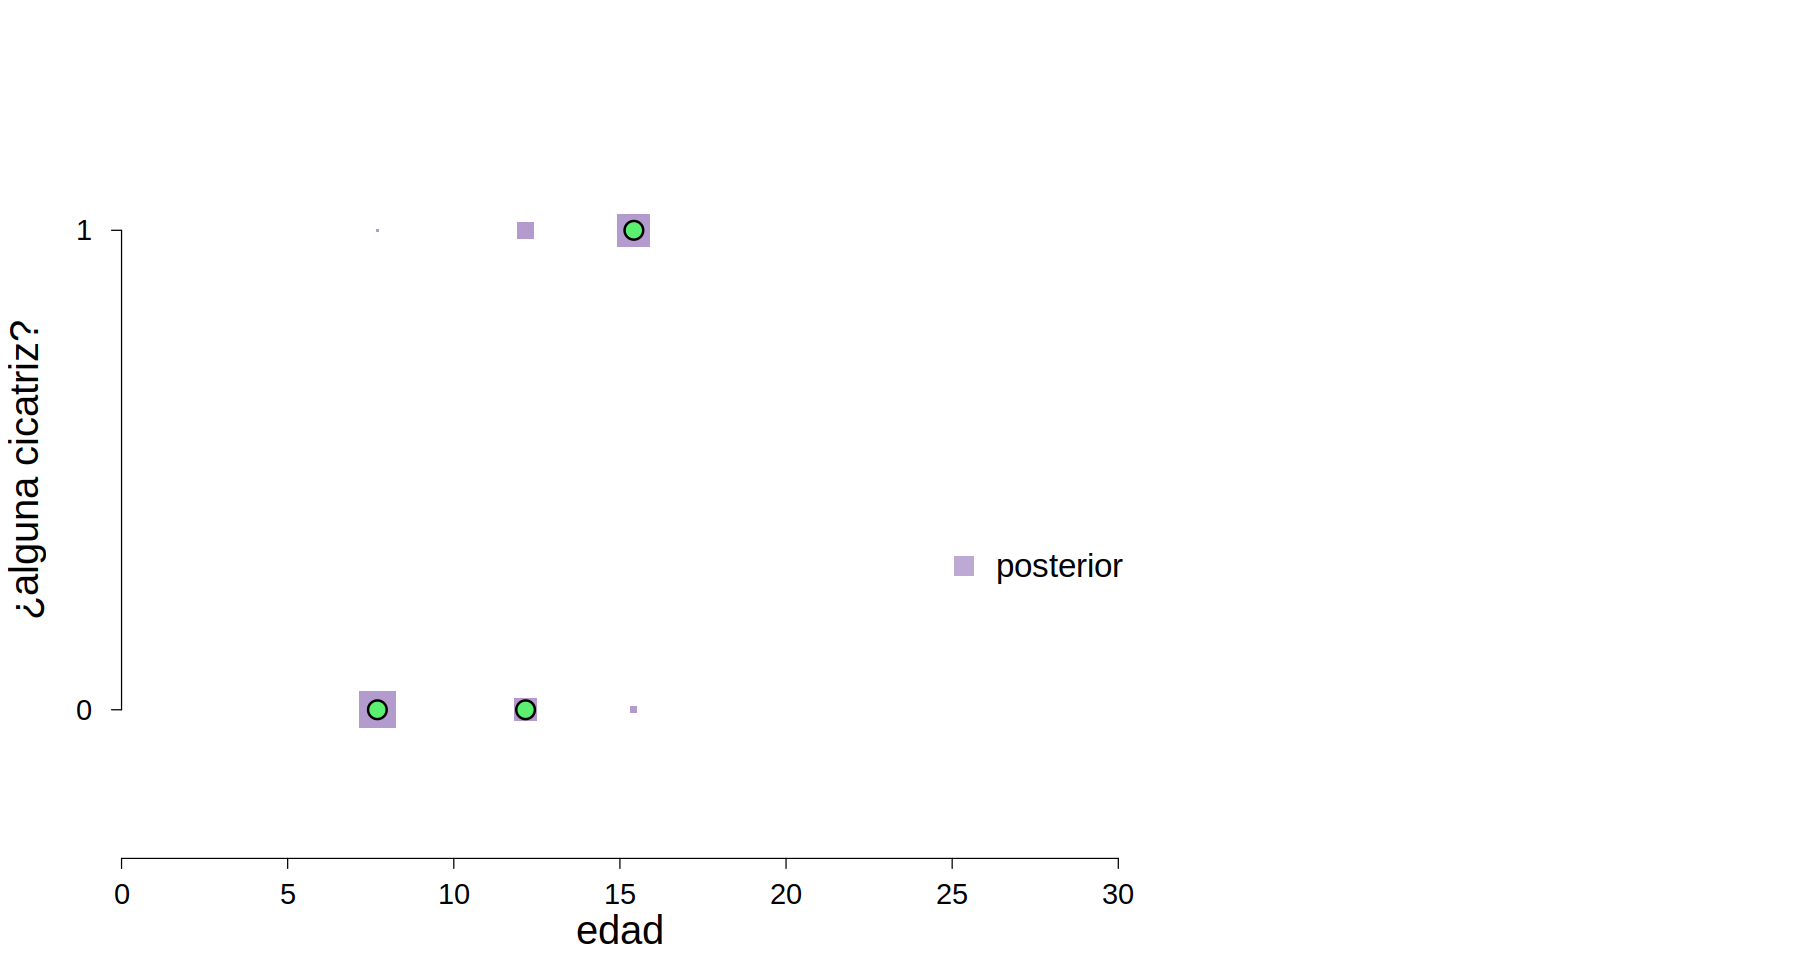

In [9]:
col_prior <- '#daa4f9'
col_post <- '#5e2a96'

options(repr.plot.width = 15, repr.plot.height = 8)
layout(matrix(c(1,1,0,0),ncol=2),widths = c(2,1))
par(cex.axis=1.75,mgp=c(2,1.5,0))
plot(NULL,xlim=c(0,30),ylim=c(-.25,1.25),axes=F,ann=F)
axis(1)
axis(2,at=c(0,1),las=1,pos=0)
mtext('edad',1,cex=2,line=3.5)
mtext('¿alguna cicatriz?',2,cex=2,line=2)
# Observation to highlight:
highlight <- c(10,11,75)
for(h in highlight){
    postdiction <- nds$y_postdict_post[,h]
    post_1 <- sum(postdiction)/length(postdiction)
    post_0 <- 1-post_1
    points(x=rep(x_simul[h],2),y=c(0,1),cex=c(post_0,post_1)*6,pch=22,bg=paste(col_post,'77',sep=''),col=NA)
}
legend(23,0.3,yjust=0.5,pt.cex=3,
       pch=22,pt.bg=paste(col_post,'66',sep=''),
       col=NA,legend=,'posterior',
       seg.len=.3,cex=2,x.intersp=.4,text.width=3,box.lty='blank',bg='#ffffff88')

points(x_simul[highlight],y_simul[highlight],cex=2.5,pch=21,bg=col_data,lwd=2)

In [564]:
# ¿Cómo se ve la postdicción de JAGS? (obs. 75, la última posición de 'highlight' en la célula anterior)
postdiction
sum(postdiction)/length(postdiction)

[1] 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
  [38] 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0
  [75] 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0
 [112] 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1
 [149] 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1
 [186] 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 [223] 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0
 [260] 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0
 [297] 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0
 [334] 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0
 [371] 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1
 [408] 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0
 [445] 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1
 [482] 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 [519] 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0
 [556] 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1
 [593] 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0
 [630] 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 [667] 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [704] 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0
 [741] 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 [778] 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0
 [815] 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 [852] 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1
 [889] 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0
 [926] 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1
 [963] 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0
[1000] 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0
[1037] 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0
[1074] 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
[1111] 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
[1148] 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
[1185] 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1
[1222] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0
[1259] 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
[1296] 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0
[1333] 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1
[1370] 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1
[1407] 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
[1444] 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0
[1481] 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0
[1518] 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
[1555] 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0
[1592] 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0
[1629] 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1
[1666] 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
[1703] 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
[1740] 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1
[1777] 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1
[1814] 0 0 1 0 1 0 1 1 1 0 1 0 1 1

[1] 0.4232222

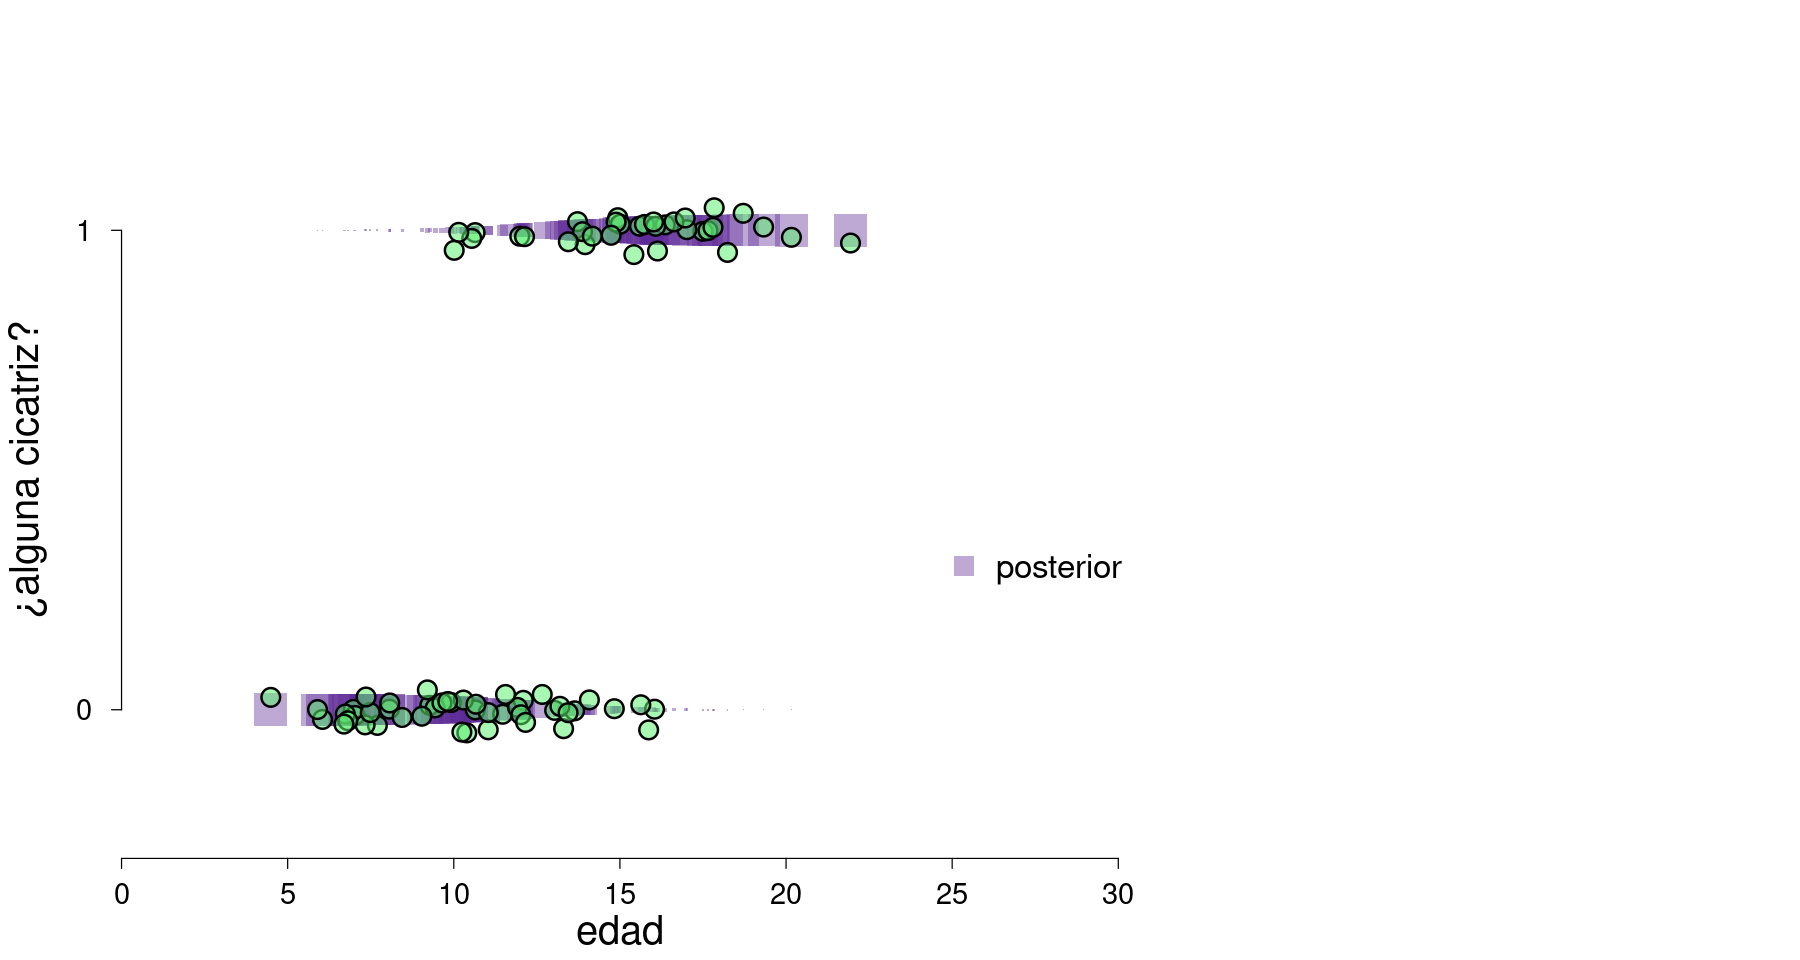

In [565]:
options(repr.plot.width = 15, repr.plot.height = 8)
layout(matrix(c(1,1,0,0),ncol=2),widths = c(2,1))
par(cex.axis=1.75,mgp=c(2,1.5,0))
plot(NULL,xlim=c(0,30),ylim=c(-.25,1.25),axes=F,ann=F)
axis(1)
axis(2,at=c(0,1),las=1,pos=0)
mtext('edad',1,cex=2,line=3.5)
mtext('¿alguna cicatriz?',2,cex=2,line=2)
# Observation to highlight:
highlight <- 1:length(x_simul)
for(h in highlight){
    postdiction <- nds$y_postdict_post[,h]
    post_1 <- sum(postdiction)/length(postdiction)
    post_0 <- 1-post_1
    points(x=rep(x_simul[h],2),y=c(0,1),cex=c(post_0,post_1)*5,pch=22,bg=paste(col_post,'66',sep=''),col=NA)
}

legend(23,0.3,yjust=0.5,pt.cex=3,
       pch=22,pt.bg=paste(col_post,'66',sep=''),
       col=NA,legend=,'posterior',
       seg.len=.3,cex=2,x.intersp=.4,text.width=3,box.lty='blank',bg='#ffffff88')

points(x_simul,y_simul+jitter,cex=2.5,pch=21,bg=paste(col_data,'88',sep=''),lwd=2)

### Incertidumbre sobre $\theta_y$

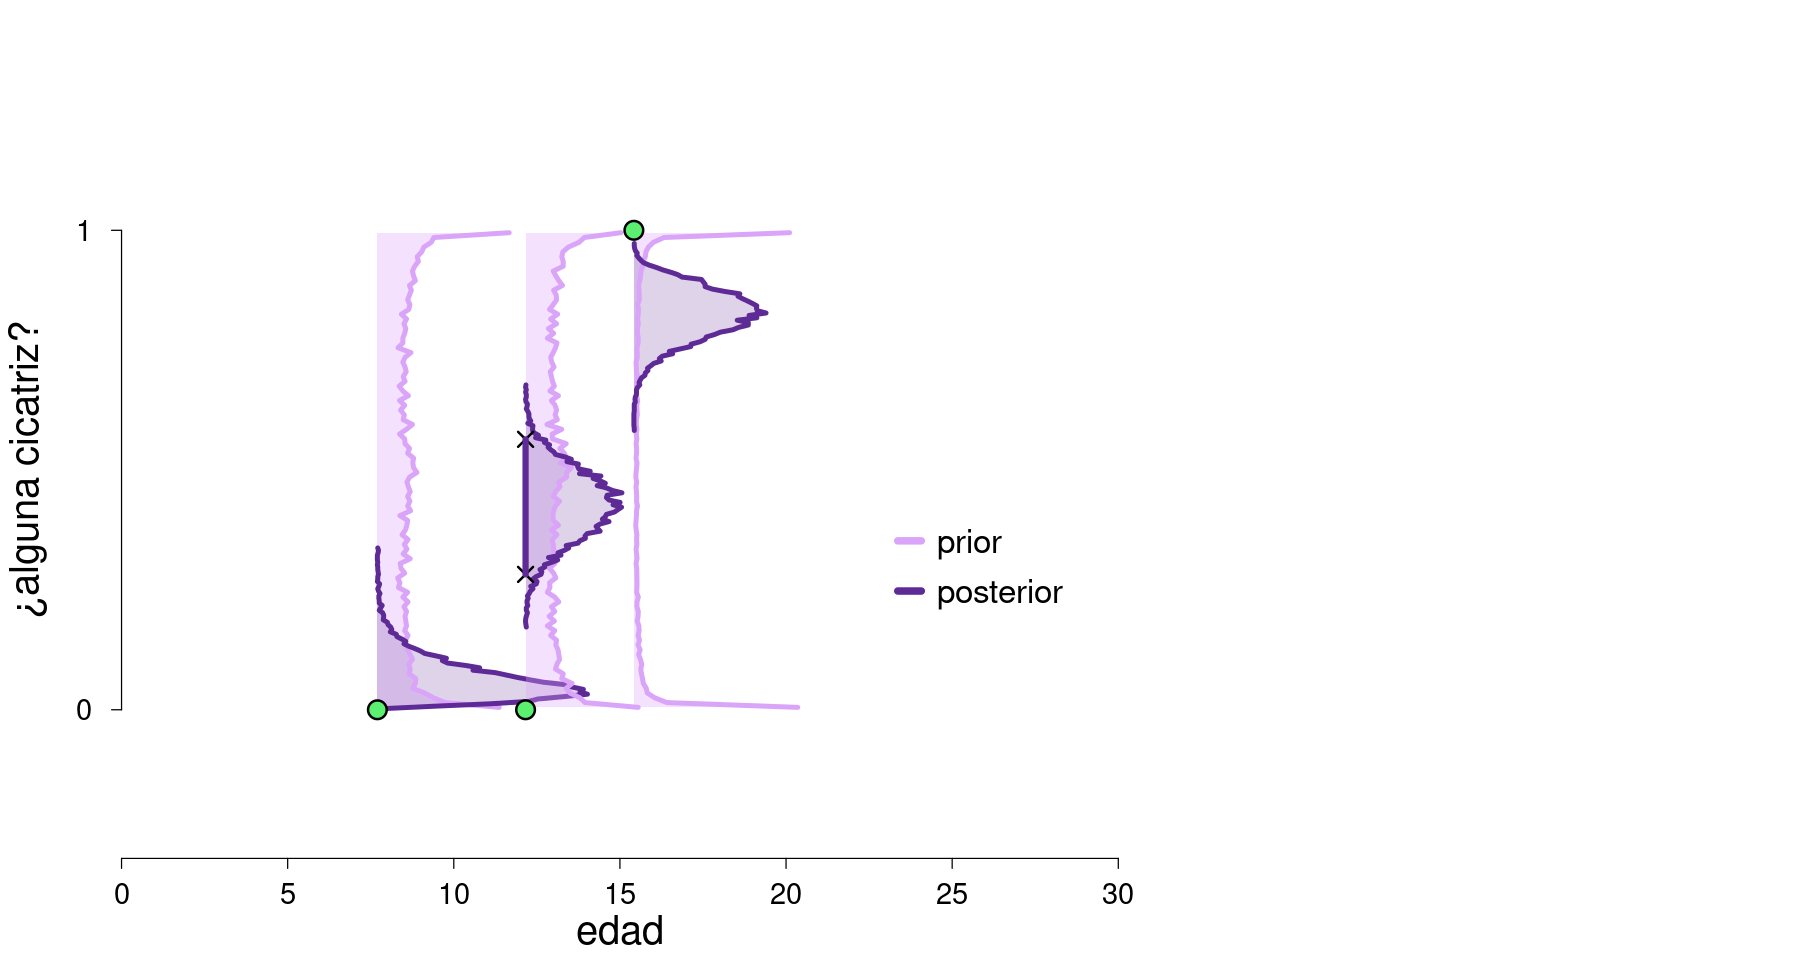

In [566]:
options(repr.plot.width = 15, repr.plot.height = 8)
layout(matrix(c(1,1,0,0),ncol=2),widths = c(2,1))
par(cex.axis=1.75,mgp=c(2,1.5,0))
plot(NULL,xlim=c(0,30),ylim=c(-.25,1.25),axes=F,ann=F)
axis(1)
axis(2,at=c(0,1),las=1,pos=0)
mtext('edad',1,cex=2,line=3.5)
mtext('¿alguna cicatriz?',2,cex=2,line=2)
# Observation to highlight:
highlight <- c(10,11,75)
zoom_prior <- c(1,.25,1)
cnt <- 0
for(h in highlight){
    cnt <- cnt+1
    th_post <- hist(nds$theta_y_post[,h],breaks=80,plot=F)
    th_prior <- hist(nds$theta_y_prior[,h],breaks=80,plot=F)
    x_prr <- th_prior$density*zoom_prior[cnt]+x_simul[h]
    x_pst <- th_post$density*.5+x_simul[h]
    y_prr <- th_prior$mids
    y_pst <- th_post$mids
    polygon(x=c(x_simul[h],x_prr,x_simul[h]),y=c(head(y_prr,1),y_prr,tail(y_prr,1)),border=NA,col=paste(col_prior,'54',sep=''))
    polygon(x=c(x_simul[h],x_pst,x_simul[h]),y=c(head(y_pst,1),y_pst,tail(y_pst,1)),border=NA,col=paste(col_post,'34',sep=''))
    lines(x_prr,y_prr,col=col_prior,lwd=4)
    lines(x_pst,y_pst,col=col_post,lwd=4)
}
hdi_post <- quantile(nds$theta_y_post[,h],probs = c(0.025,0.975))
points(rep(x_simul[h],2),hdi_post,pch=4,cex=2,lwd=2)
lines(x=rep(x_simul[h],2),y=hdi_post,lwd=5,col=col_post)

legend(21,0.3,yjust=0.5,lwd=6,
       col=c(col_prior,col_post),legend=c('prior','posterior'),
       seg.len=.3,cex=2,x.intersp=.2,text.width=3,box.lty='blank',bg='#ffffff88')

points(x_simul[highlight],y_simul[highlight],cex=2.5,pch=21,bg=col_data,lwd=2)

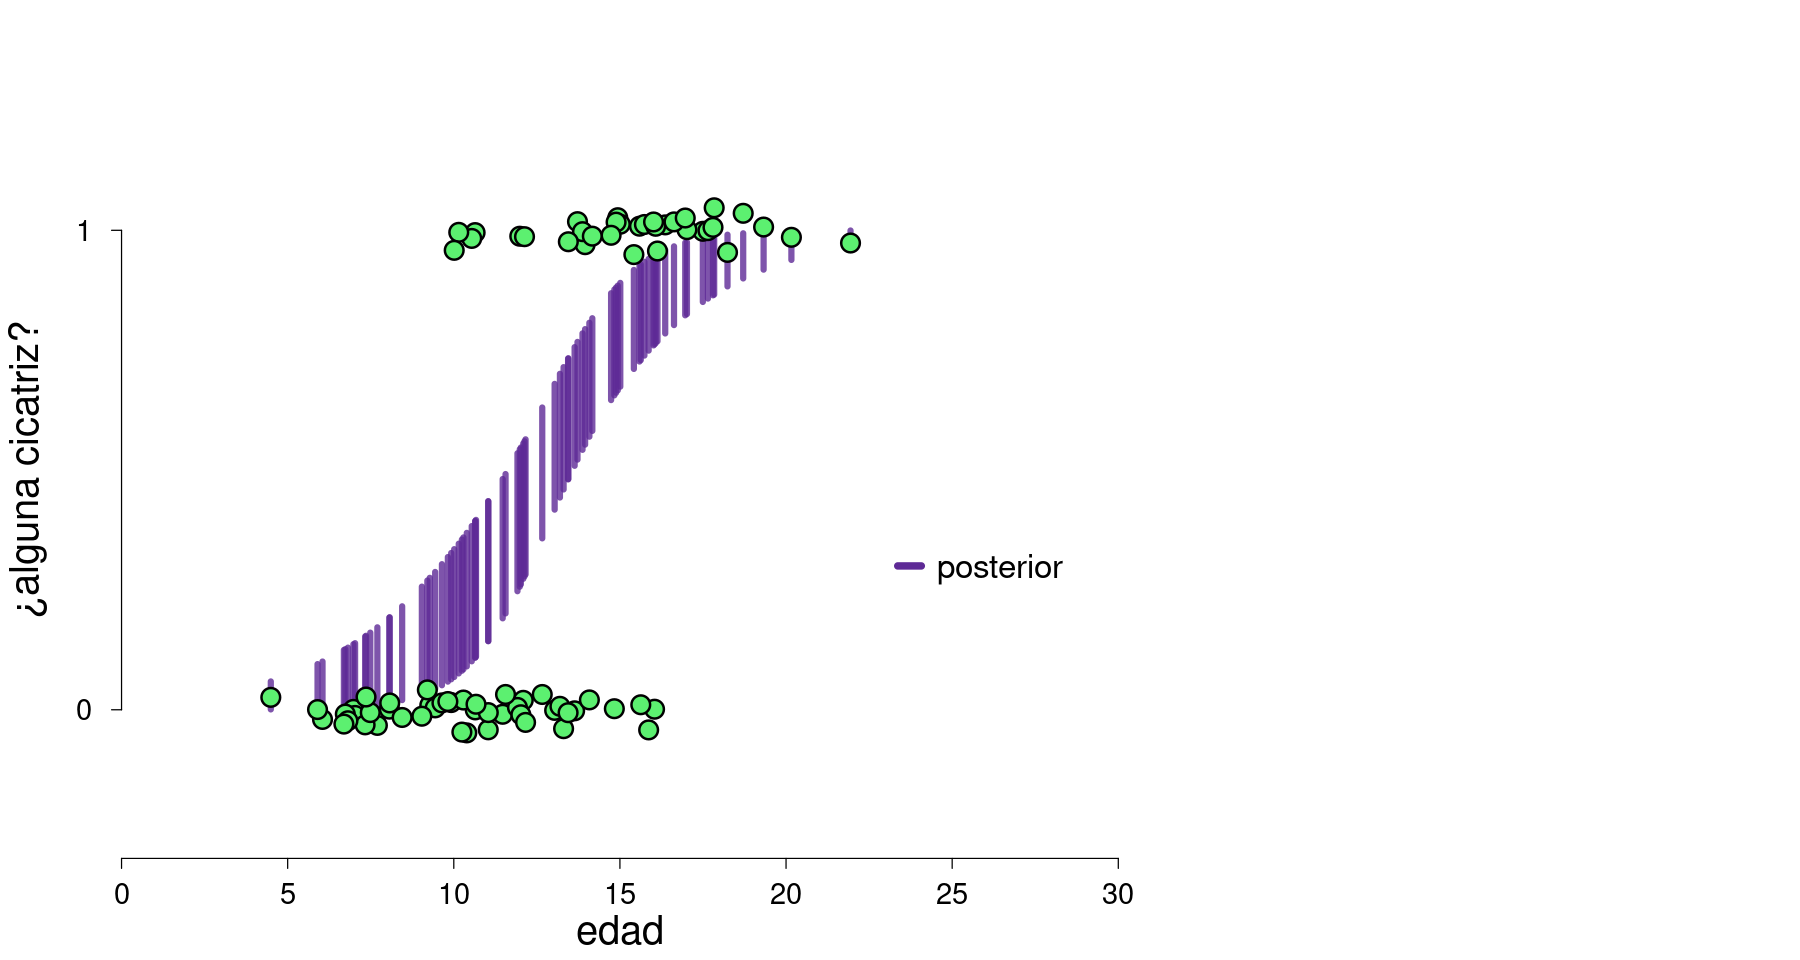

In [567]:
options(repr.plot.width = 15, repr.plot.height = 8)
layout(matrix(c(1,1,0,0),ncol=2),widths = c(2,1))
par(cex.axis=1.75,mgp=c(2,1.5,0))
plot(NULL,xlim=c(0,30),ylim=c(-.25,1.25),axes=F,ann=F)
axis(1)
axis(2,at=c(0,1),las=1,pos=0)
mtext('edad',1,cex=2,line=3.5)
mtext('¿alguna cicatriz?',2,cex=2,line=2)
# Observation to highlight:
highlight <- 1:length(x_simul)
for(h in highlight){
    hdi_post <- quantile(nds$theta_y_post[,h],probs = c(0.025,0.975))
    lines(x=rep(x_simul[h],2),y=hdi_post,lwd=5,col=paste(col_post,'cc',sep=''))
}

legend(21,0.3,yjust=0.5,lwd=6,
       col=c(col_post),legend=c('posterior'),
       seg.len=.3,cex=2,x.intersp=.2,text.width=3,box.lty='blank',bg='#ffffff88')

points(x_simul,y_simul+jitter,cex=2.5,pch=21,bg=col_data,lwd=2)

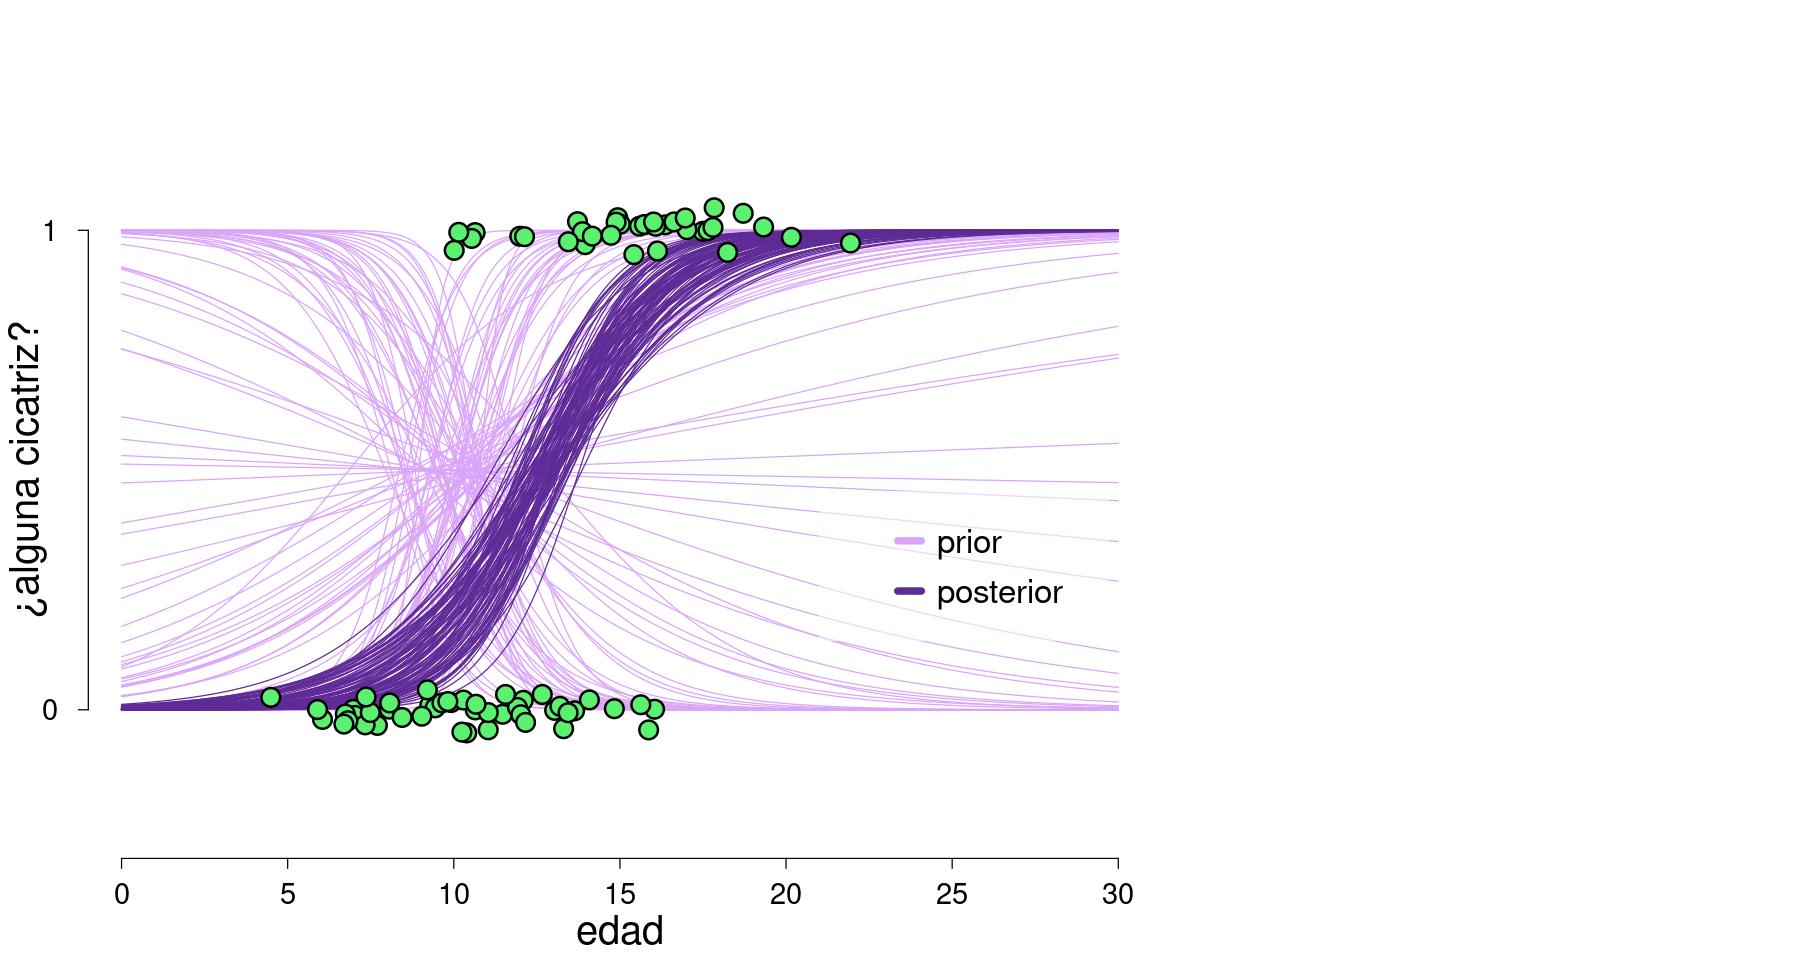

In [568]:
options(repr.plot.width = 15, repr.plot.height = 8)
layout(matrix(c(1,1,0,0),ncol=2),widths = c(2,1))
par(cex.axis=1.75,mgp=c(2,1.5,0))
plot(NULL,xlim=c(0,30),ylim=c(-.25,1.25),axes=F,ann=F)
axis(1)
axis(2,at=c(0,1),las=1,pos=-1)
mtext('edad',1,cex=2,line=3.5)
mtext('¿alguna cicatriz?',2,cex=2,line=2)
# indexes in JAGS to plot:
index <- sample(1:dim(nds$alpha_post)[1],size=100)
x_plot <- seq(0,30,0.01)
for(i in index){
    
    a_prior <- nds$alpha_prior[i]
    x0_prior <- nds$x0_prior[i]
    lines(x_plot,1/(1+exp(-a_prior*(x_plot-x0_prior))),col=col_prior)
}
for(i in index){
    a_post <- nds$alpha_post[i]
    x0_post <- nds$x0_post[i]
    lines(x_plot,1/(1+exp(-a_post*(x_plot-x0_post))),col=col_post)
}

legend(21,0.3,yjust=0.5,lwd=6,
       col=c(col_prior,col_post),legend=c('prior','posterior'),
       seg.len=.3,cex=2,x.intersp=.2,text.width=4,box.lty='blank',bg='#ffffff88')

points(x_simul,y_simul+jitter,cex=2.5,pch=21,bg=col_data,lwd=2)

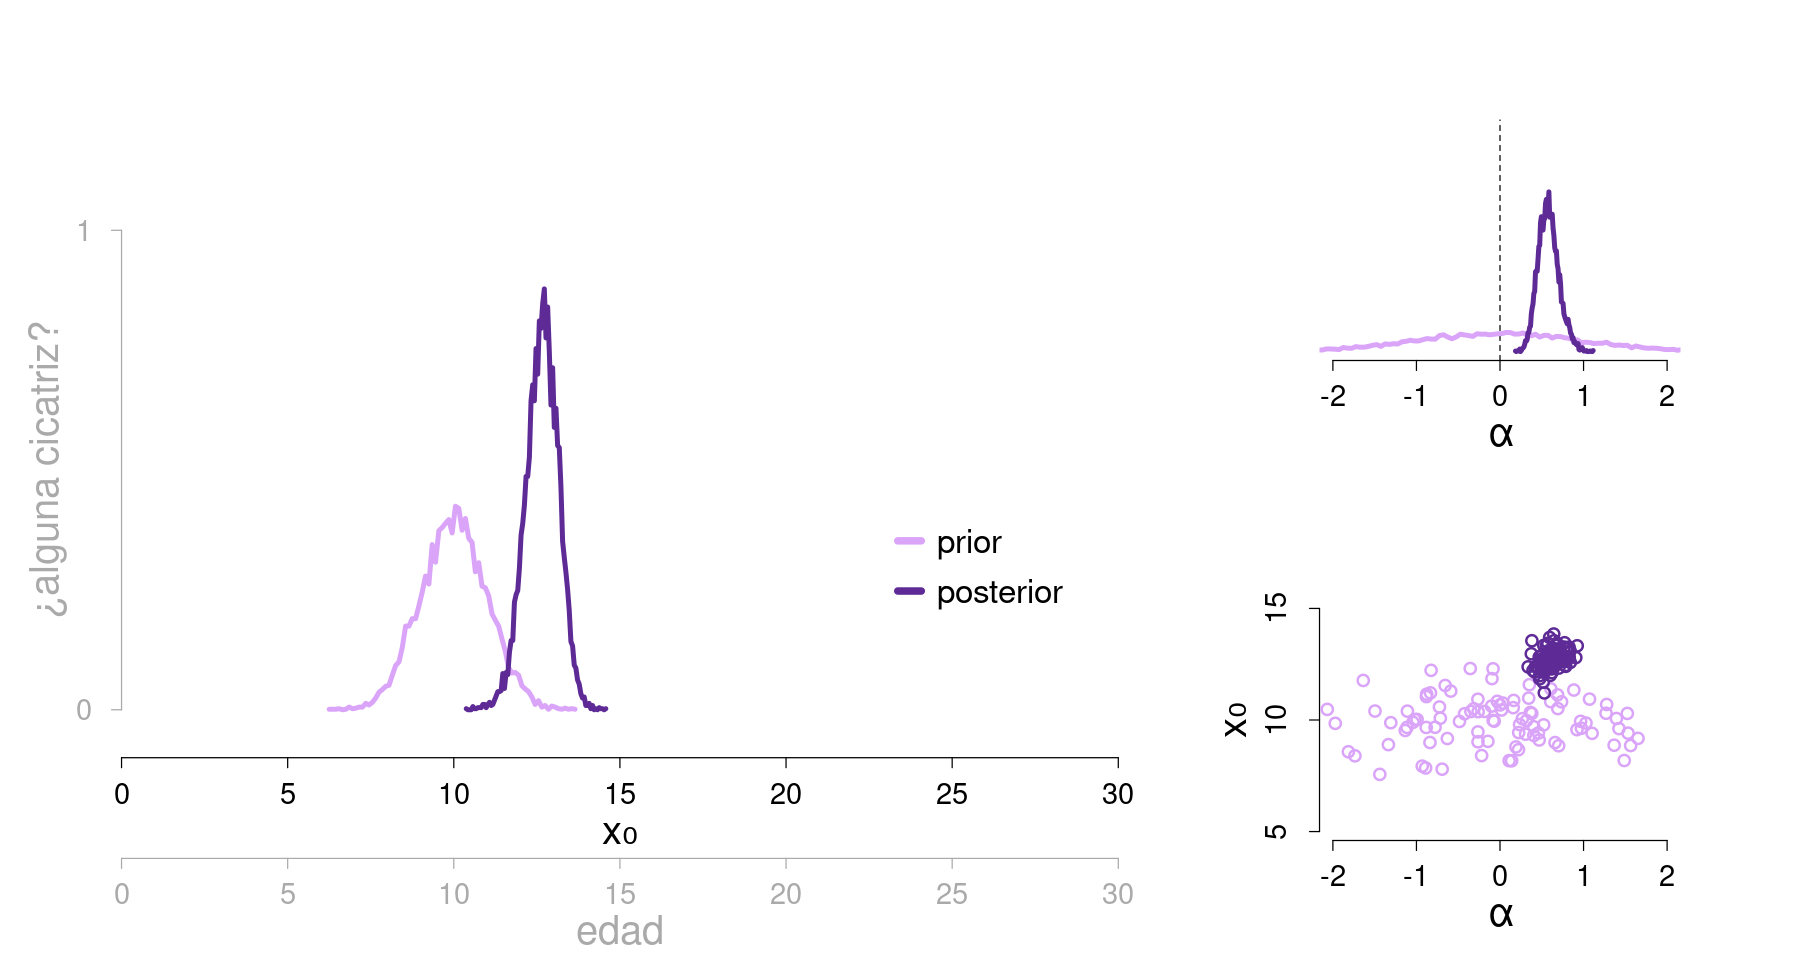

In [572]:
options(repr.plot.width = 15, repr.plot.height = 8)
layout(matrix(c(1,1,2,3),ncol=2),widths = c(2,1))
par(cex.axis=1.75,mgp=c(2,1.5,0))
plot(NULL,xlim=c(0,30),ylim=c(-.25,1.25),axes=F,ann=F)
axis(1,col='#aaaaaa',col.axis='#aaaaaa')
axis(2,at=c(0,1),las=1,pos=0,col='#aaaaaa',col.axis='#aaaaaa')
mtext('edad',1,cex=2,line=3.5,col='#aaaaaa')
axis(1,pos=-0.1)
mtext('x\u2080',1,cex=2,line=-1.5)
mtext('¿alguna cicatriz?',2,cex=2,line=1,col='#aaaaaa')
x0_pst <- hist(nds$x0_post,breaks=100,plot=F)
x0_prr <- hist(nds$x0_prior,breaks=100,plot=F)
lines(x0_prr$mids,x0_prr$density,col=col_prior,lwd=4)
lines(x0_pst$mids,x0_pst$density,col=col_post,lwd=4)
legend(21,0.3,yjust=0.5,lwd=6,
       col=c(col_prior,col_post),legend=c('prior','posterior'),
       seg.len=.3,cex=2,x.intersp=.2,text.width=3,box.lty='blank',bg='#ffffff88')
# Uncertainty over alpha
par(mar=rep(6,4))
plot(NULL,xlim=c(-2,2),ylim=c(0,5),axes=F,ann=F)
axis(1)
abline(v=0,lty='dashed')
alpha_pst <- hist(nds$alpha_post,breaks=100,plot=F)
alpha_prr <- hist(nds$alpha_prior,breaks=100,plot=F)
lines(alpha_prr$mids,alpha_prr$density,col=col_prior,lwd=4)
lines(alpha_pst$mids,alpha_pst$density,col=col_post,lwd=4)
mtext('\u03b1',1,cex=2,line=3.5)
# Joint uncertainty over alpha and x0
plot(NULL,xlim=c(-2,2),ylim=c(5,15),axes=F,ann=F)
axis(1)
axis(2,at=c(5,10,15))
index <- sample(1:dim(nds$alpha_post)[1],size=100)
points(nds$alpha_prior[index],nds$x0_prior[index],cex=1.5,col=col_prior,lwd=2)
points(nds$alpha_post[index],nds$x0_post[index],cex=1.5,col=col_post,lwd=2)
mtext('\u03b1',1,cex=2,line=3.5)
mtext('x\u2080',2,cex=2,line=3.5)

### Ejercicio: Otro Modelo Logístico

Es común encontrar el modelo logístico expresado de manera ligeramente diferente:

$$\theta_y=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x)}},$$

en donde los parámetros $\beta_0$ y $\beta_1$ representan características ligeramente diferentes a las que hemos estudiado. 

Expresa a los parámetros $\alpha$ y $x_0$ como función de $\beta_1$ y $\beta_0$, para que cuando encuentres reportes de estos dos últimos parámetros puedas traducirlos en términos de la tasa de crecimiento y del punto medio de la curva logística.